In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
path = os.getcwd()
data_dir_spacy = os.path.join(path, "df_entities_spacy.csv")
data_dir_stanza = os.path.join(path, "df_entities_stanza.csv")

df_spacy = pd.read_csv(data_dir_spacy)
df_stanza= pd.read_csv(data_dir_stanza)

## Statistics for each package

In [3]:
# separating by category for the spacy package
df_spacy_chemistry = df_spacy[df_spacy["category"] == "Chemistry"]
df_spacy_physics = df_spacy[df_spacy["category"] == "Physics"]

In [4]:
# separating by category for the stanza package
df_stanza_chemistry = df_stanza[df_stanza["category"] == "Chemistry"]
df_stanza_physics = df_stanza[df_stanza["category"] == "Physics"]

In [5]:
# Function to calculate avg/min/max number of NEs per biography

def calculate_ne_stats(df):
    ne_counts = df.groupby('subject')['text'].count()
    return ne_counts.agg(['mean', 'min', 'max'])

In [6]:
# Get statistics for spaCy by biography
spacy_ne_stats_phy = calculate_ne_stats(df_spacy_physics)
spacy_ne_stats_che = calculate_ne_stats(df_spacy_chemistry)

# stats for number of words per entity for spaCy
spacy_word_stats_phy = df_spacy_physics['n_word'].agg(['mean', 'min', 'max'])
spacy_word_stats_che = df_spacy_chemistry['n_word'].agg(['mean', 'min', 'max'])

# Get statistics for Stanza by biography
stanza_ne_stats_phy = calculate_ne_stats(df_stanza_physics)
stanza_ne_stats_che = calculate_ne_stats(df_stanza_chemistry)

# stats for number of words per entity for spaCy
stanza_word_stats_phy = df_stanza_physics['n_word'].agg(['mean', 'min', 'max'])
stanza_word_stats_che = df_stanza_chemistry['n_word'].agg(['mean', 'min', 'max'])

### SpaCy

#### Entities per biography

##### Chemistry

In [7]:
# mean number of entities in bios, min number of entities in a bio, max number of entities in a bio
print("\nStatistics for SpaCy NERs by biography in the Chemistry category:\n", spacy_ne_stats_che)


Statistics for SpaCy NERs by biography in the Chemistry category:
 mean     216.17
min       37.00
max     1466.00
Name: text, dtype: float64


In [8]:
print("Chemistry People with the min. number of entities in their biography:")
for person in list(np.unique(df_spacy_chemistry["subject"])):
    length = len(df_spacy_chemistry[df_spacy_chemistry["subject"] == person])
    if length <= 37.00:
        print(" ", person)

print("Chemistry People with the max. number of entities in their biography:")
for person in list(np.unique(df_spacy_chemistry["subject"])):
    length = len(df_spacy_chemistry[df_spacy_chemistry["subject"] == person])
    if length >= 1466.00:
        print(" ", person)

Chemistry People with the min. number of entities in their biography:
  The Svedberg
Chemistry People with the max. number of entities in their biography:
  Otto Hahn


##### Physics

In [9]:
# mean number of entities in bios, min number of entities in a bio, max number of entities in a bio
print("Statistics for SpaCy NERs by biography in the Physics category:\n", spacy_ne_stats_phy)

Statistics for SpaCy NERs by biography in the Physics category:
 mean     382.54
min       79.00
max     1762.00
Name: text, dtype: float64


In [10]:
print("Physics People with the min. number of entities in their biography:")
for person in list(np.unique(df_spacy_physics["subject"])):
    length = len(df_spacy_physics[df_spacy_physics["subject"] == person])
    if length <= 79.00:
        print(" ", person)

print("Physics People with the max. number of entities in their biography:")
for person in list(np.unique(df_spacy_physics["subject"])):
    length = len(df_spacy_physics[df_spacy_physics["subject"] == person])
    if length >= 1762.00:
        print(" ", person)

Physics People with the min. number of entities in their biography:
  Manne Siegbahn
Physics People with the max. number of entities in their biography:
  Richard Feynman


#### Number of words per entity

##### Chemistry

In [11]:
# mean number of words, min number of words in an entity, max number of words in an entity
print("\nStatistics for SpaCy NERs by number of words in the Chemistry category:\n", spacy_word_stats_che)


Statistics for SpaCy NERs by number of words in the Chemistry category:
 mean     1.902947
min      1.000000
max     16.000000
Name: n_word, dtype: float64


In [12]:
min_words = set(df_spacy_chemistry[df_spacy_chemistry["n_word"] <= 1]["text"].to_list())
max_words = set(df_spacy_chemistry[df_spacy_chemistry["n_word"] >= 16]["text"].to_list())

In [13]:
# min_words # as expected, there are a lot of 1-word entities

In [14]:
print("Longest entity in the Chemistry category:")
for ent in max_words:
    print(ent)

Longest entity in the Chemistry category:
the National Committee of the Union of French Women (Comité National de l'Union des Femmes Françaises


##### Physics

In [15]:
# mean number of words, min number of words in an entity, max number of words in an entity
print("Statistics for SpaCy NERs by number of words in the Physics category:\n", spacy_word_stats_phy)

Statistics for SpaCy NERs by number of words in the Physics category:
 mean     1.87583
min      1.00000
max     19.00000
Name: n_word, dtype: float64


In [16]:
min_words = set(df_spacy_physics[df_spacy_physics["n_word"] <= 1]["text"].to_list())
max_words = set(df_spacy_physics[df_spacy_physics["n_word"] >= 16]["text"].to_list())

In [17]:
# min_words # as expected, there are a lot of 1-word entities

In [18]:
print("Longest entity in the Physics category:")
for ent in max_words:
    print(ent)

Longest entity in the Physics category:
The Man Who Stalked Einstein: How Nazi Scientist Philipp Lenard Changed the Course of History by Bruce J. Hillman
On the Absorption of α Rays and on the Classification of the α Rays from Radium
On the Structure of the Atom: an Investigation of the Stability and Periods of Oscillation of a number
1
      
    
    {\displaystyle N-N'={\frac


### Stanza

#### Entities per biography

##### Chemistry

In [19]:
# mean number of entities in bios, min number of entities in a bio, max number of entities in a bio
print("\nStatistics for Stanza NERs by biography in the Chemistry category:\n", stanza_ne_stats_che)


Statistics for Stanza NERs by biography in the Chemistry category:
 mean     215.71
min       25.00
max     1505.00
Name: text, dtype: float64


In [20]:
print("Chemistry People with the min. number of entities in their biography:")
for person in list(np.unique(df_stanza_chemistry["subject"])):
    length = len(df_stanza_chemistry[df_stanza_chemistry["subject"] == person])
    if length <= 25.00:
        print(" ", person)

print("Chemistry People with the max. number of entities in their biography:")
for person in list(np.unique(df_stanza_chemistry["subject"])):
    length = len(df_stanza_chemistry[df_stanza_chemistry["subject"] == person])
    if length >= 1505.00:
        print(" ", person)

Chemistry People with the min. number of entities in their biography:
  The Svedberg
Chemistry People with the max. number of entities in their biography:
  Otto Hahn


##### Physics

In [21]:
# mean number of entities in bios, min number of entities in a bio, max number of entities in a bio
print("Statistics for Stanza NERs by biography in the Physics category:\n", stanza_ne_stats_phy)

Statistics for Stanza NERs by biography in the Physics category:
 mean     382.09
min       79.00
max     1712.00
Name: text, dtype: float64


In [22]:
print("Physics People with the min. number of entities in their biography:")
for person in list(np.unique(df_stanza_physics["subject"])):
    length = len(df_stanza_physics[df_stanza_physics["subject"] == person])
    if length <= 79.00:
        print(" ", person)

print("Physics People with the max. number of entities in their biography:")
for person in list(np.unique(df_stanza_physics["subject"])):
    length = len(df_stanza_physics[df_stanza_physics["subject"] == person])
    if length >= 1712.00:
        print(" ", person)

Physics People with the min. number of entities in their biography:
  Pavel Cherenkov
Physics People with the max. number of entities in their biography:
  Richard Feynman


#### Number of words per entity

#####   Chemistry

In [23]:
# mean number of words, min number of words in an entity, max number of words in an entity
print("\nStatistics for Stanza NERs by number of words in the Chemistry category:\n", stanza_word_stats_che)


Statistics for Stanza NERs by number of words in the Chemistry category:
 mean     1.978211
min      1.000000
max     32.000000
Name: n_word, dtype: float64


In [24]:
min_words = set(df_stanza_chemistry[df_stanza_chemistry["n_word"] <= 1]["text"].to_list())
max_words = set(df_stanza_chemistry[df_stanza_chemistry["n_word"] >= 32]["text"].to_list())

In [25]:
# min_words # as expected, there are a lot of 1-word entities

In [26]:
print("Longest entities in the Chemistry category:")
for ent in max_words:
    print(ent)

Longest entities in the Chemistry category:
Some Problems Relating to Chain Reactions and to the Theory of Combustion
Semyonov's  Nobel Lecture Some Problems Relating to Chain Reactions and to the Theory of Combustion
N.N. Semenov Institute of Chemical Physics


#####   Physics

In [27]:
# mean number of words, min number of words in an entity, max number of words in an entity
print("Statistics for Stanza NERs by number of words in the Physics category:\n", stanza_word_stats_phy)

Statistics for Stanza NERs by number of words in the Physics category:
 mean     1.970635
min      1.000000
max     50.000000
Name: n_word, dtype: float64


In [28]:
min_words = set(df_stanza_physics[df_stanza_physics["n_word"] <= 1]["text"].to_list())
max_words = set(df_stanza_physics[df_stanza_physics["n_word"] >= 50]["text"].to_list())

In [29]:
# min_words # as expected, there are a lot of 1-word entities

In [30]:
print("Longest entities in the Physics category:")
for ent in max_words:
    print(ent)

Longest entities in the Physics category:
Jubilee Medal "Forty Years of Victory in the Great Patriotic War 1941-1945"
Medal "For Valiant Labour in the Great Patriotic War 1941-1945"
Medal "Veteran of Labour"
Jubilee Medal "50 Years of the Armed Forces of the USSR"
Medal "In Commemoration of the 800th Anniversary of Moscow"
Medal "In Commemoration of the 850th Anniversary of Moscow"


## Visualizations

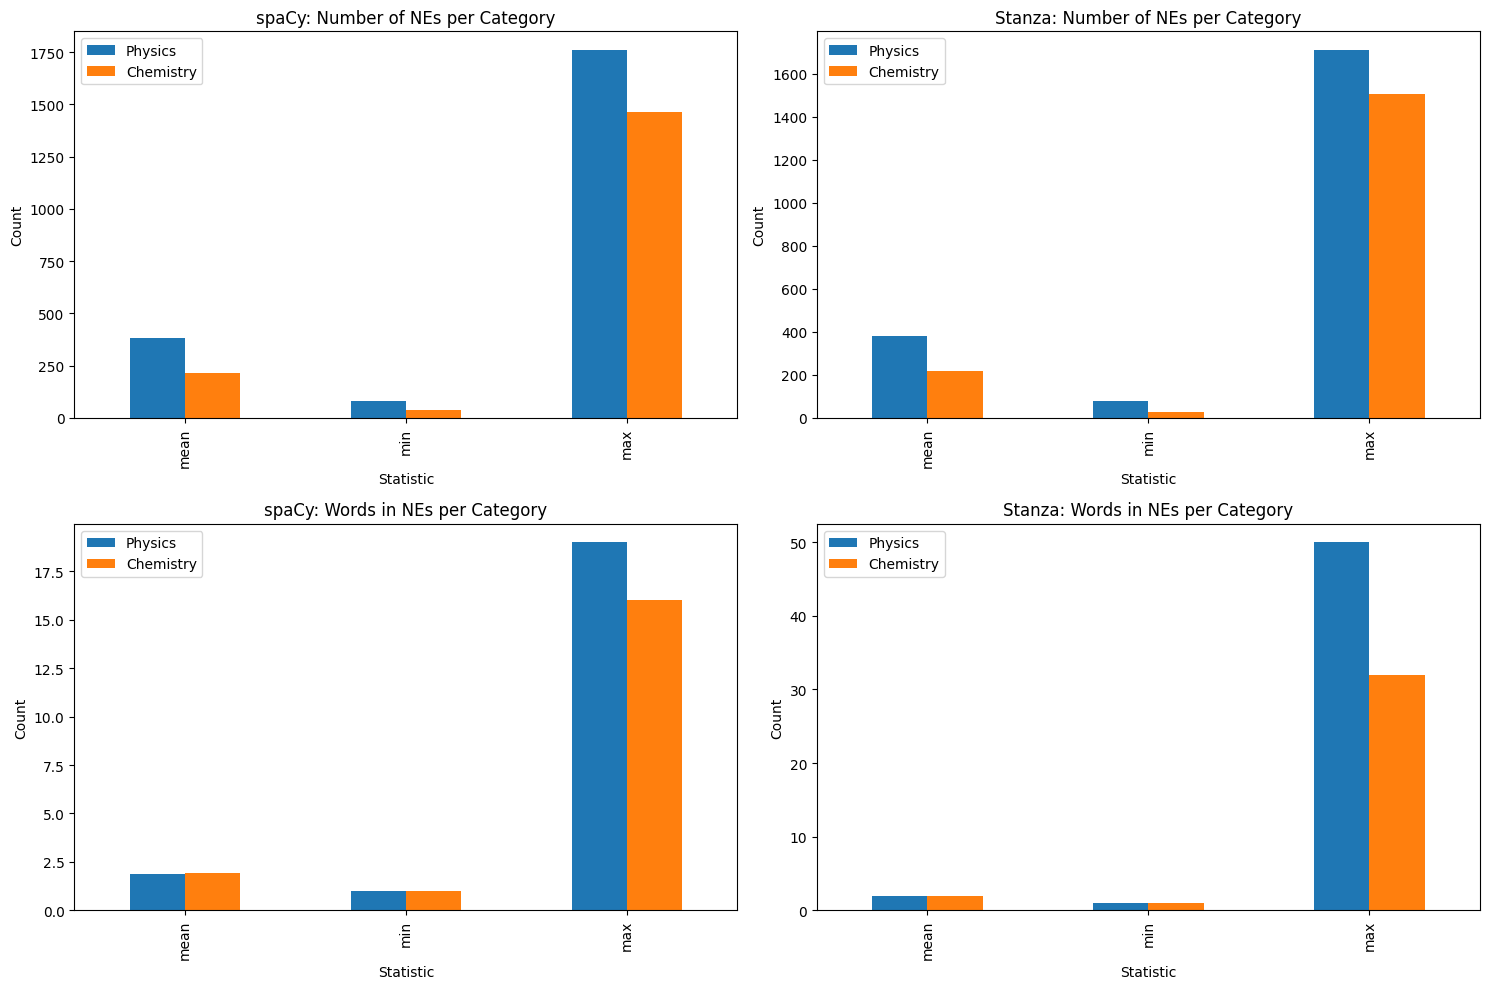

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Avg/Min/Max number of NEs per category per package
spacy_ne_stats = pd.DataFrame({
    'Physics': spacy_ne_stats_phy,
    'Chemistry': spacy_ne_stats_che
})
stanza_ne_stats = pd.DataFrame({
    'Physics': stanza_ne_stats_phy,
    'Chemistry': stanza_ne_stats_che
})

# Plot number of NEs
spacy_ne_stats.plot(kind='bar', ax=axes[0, 0], title='spaCy: Number of NEs per Category')
stanza_ne_stats.plot(kind='bar', ax=axes[0, 1], title='Stanza: Number of NEs per Category')

# Avg/Min/Max number of words in each NE per category per package
spacy_word_stats = pd.DataFrame({
    'Physics': spacy_word_stats_phy,
    'Chemistry': spacy_word_stats_che
})
stanza_word_stats = pd.DataFrame({
    'Physics': stanza_word_stats_phy,
    'Chemistry': stanza_word_stats_che
})

# Plot number of words in each NE
spacy_word_stats.plot(kind='bar', ax=axes[1, 0], title='spaCy: Words in NEs per Category')
stanza_word_stats.plot(kind='bar', ax=axes[1, 1], title='Stanza: Words in NEs per Category')

# Set plot labels
for ax in axes.flat:
    ax.set_xlabel('Statistic')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()